In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import cv2
import numpy as np
import pickle
import glob
from image_process import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
test_image="./test_images/straight_lines2.jpg"

n_image=process_image(cv2.imread(test_image))

cv2.imwrite("test_out.png",n_image)

True

In [24]:
dummy_img = cv2.imread('./camera_cal/calibration1.jpg')
img_size = get_cv2_img_size(dummy_img)
IMG_FOLDER = './camera_cal/calibration*.jpg'
NX = 9
NY = 5
camcal = CameraCalibrator(img_size, IMG_FOLDER, NX, NY)
#stacked_img = stack_lane_line(image, transformed_img)

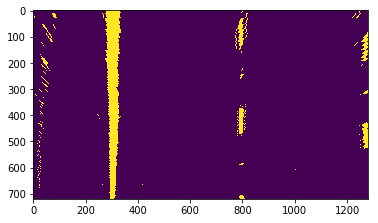

In [32]:
straight_line_img=cv2.imread("./test_images/straight_lines1.jpg")
image=cv2.imread("./test_images/test1.jpg")
all_pipes=[('cam',camcal),('undistort',EdgeExtractor()),
                               ('pers',PerspectiveTransformer()),('lane',LaneFinder()),
                               ('inv_pst',PerspectiveTransformer(inv_transform=True))]
pip=Pipeline(all_pipes[0:3])
transformed_img=pip.fit_transform(straight_line_img)

plt.imshow(transformed_img)
plt.show()


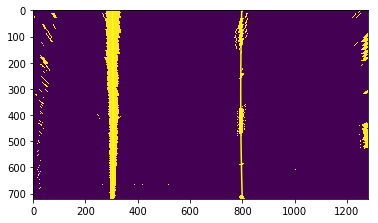

In [33]:
lane=LaneFinder()
lane.visualize(transformed_img)

In [11]:
all_pipes=[('cam',camcal),('undistort',EdgeExtractor()),
                               ('pers',PerspectiveTransformer()),('lane',lane),
                               ('inv_pst',PerspectiveTransformer(inv_transform=True))]

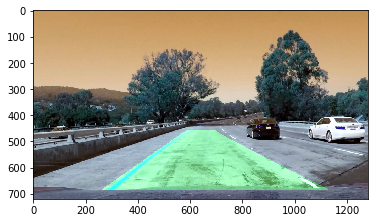

In [12]:
pip=Pipeline(all_pipes)
n_img=pip.fit_transform(image)

n_img = stack_lane_line(image, n_img)
plt.imshow(n_img)
plt.show()

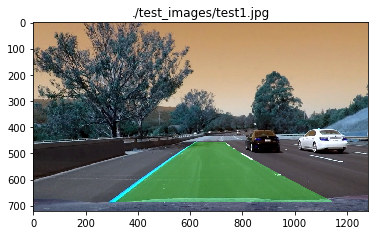

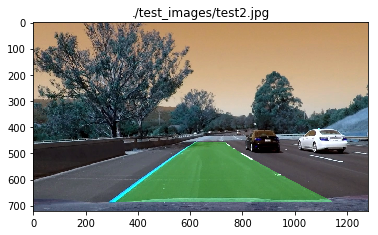

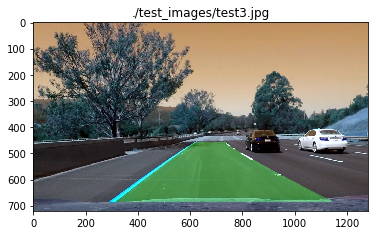

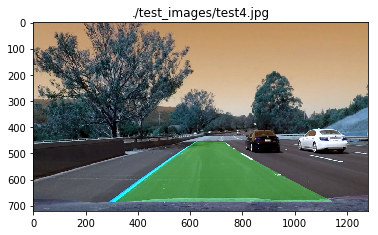

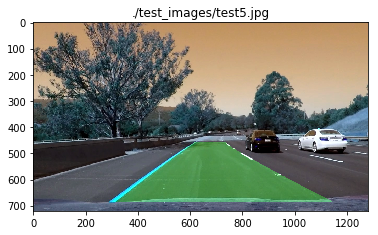

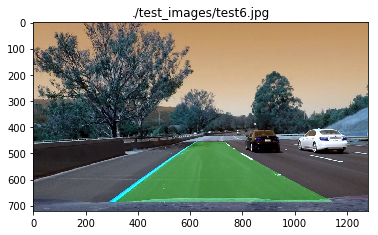

In [13]:
for f in files:
    pip=Pipeline(all_pipes)
    n_img=pip.fit_transform(cv2.imread(f))
    n_img = stack_lane_line(image, n_img)
    
    plt.figure()
    plt.imshow(n_image)
    plt.title(f)
    plt.show()

In [14]:
def process_image(image):
    pip=Pipeline(all_pipes)
    n_img=pip.fit_transform(image)
    n_img = stack_lane_line(image, n_img)
    return n_img

In [15]:
output_video_file="output.mp4"
input_video_file="project_video.mp4"
white_output = output_video_file
clip1 = VideoFileClip(input_video_file)

In [16]:
clip1.save_frame("frame2.jpeg", t='00:00:23.5')

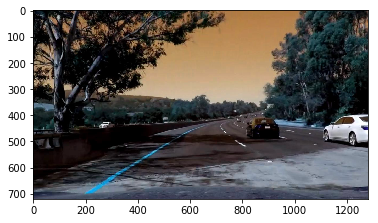

In [17]:
ege=EdgeExtractor()
all_pipes=[('cam',camcal),('undistort',ege),
                               ('pers',PerspectiveTransformer()),('lane',lane),
                               ('inv_pst',PerspectiveTransformer(inv_transform=True))]
difficult_image=cv2.imread("./project_video_images/frame.jpeg")
pip=Pipeline(all_pipes[0:1])
transformed_img=pip.fit_transform(difficult_image)

plt.imshow(transformed_img)
plt.show()

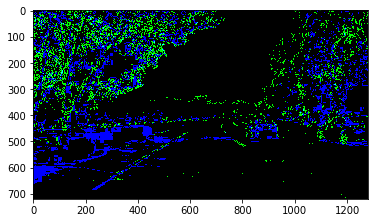

In [18]:
new_ege=EdgeExtractor(s_thresh=(190, 255), sx_thresh=(30, 100))
edges=new_ege.visualize(difficult_image)
plt.imshow(edges)
plt.show()

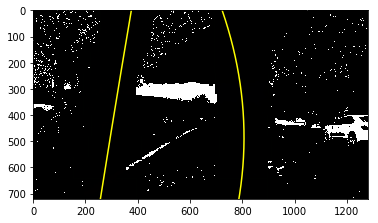

In [19]:
all_pipes=[('cam',camcal),('undistort',new_ege),
                               ('pers',PerspectiveTransformer()),('lane',lane),
                               ('inv_pst',PerspectiveTransformer(inv_transform=True))]
edges=Pipeline(all_pipes[0:2]).transform(difficult_image)
edges=LaneFinder().visualize(edges)

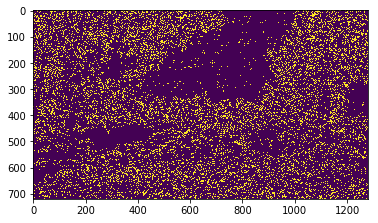

In [20]:
dir_binary=dir_threshold(difficult_image,thresh=(0.8,1.2),sobel_kernel=1)
plt.imshow(dir_binary)

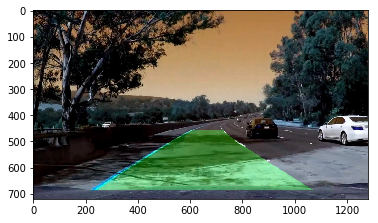

In [21]:
n_img=process_image(difficult_image)
plt.imshow(n_img)

In [22]:
white_clip = clip1.fl_image(process_image)  # NOTE: this function expects color images!!
white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video output.mp4
[MoviePy] Writing video output.mp4


100%|█████████▉| 1260/1261 [04:09<00:00,  5.87it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output.mp4 



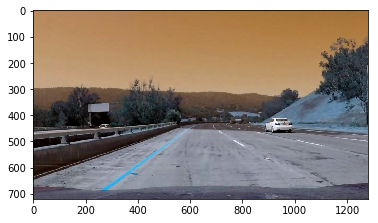

In [75]:
difficult_image=cv2.imread("./project_video_images/frame2.jpeg")
plt.imshow(difficult_image)

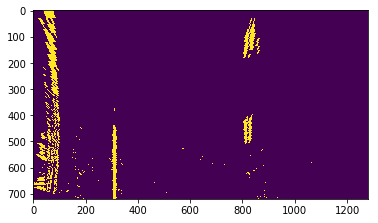

In [76]:

pip=Pipeline(all_pipes[0:3])
transformed_img=pip.fit_transform(difficult_image)
plt.imshow(transformed_img)

In [77]:
lane.visualize(transformed_img)

AttributeError: 'LaneFinder' object has no attribute 'leftx_base'

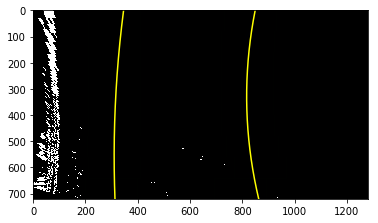

In [78]:
lane=LaneFinder()
lane.visualize(transformed_img)

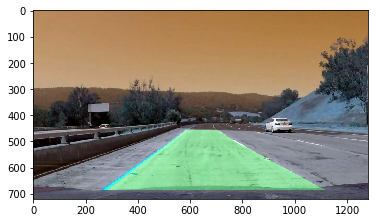

In [52]:
transformed_img=process_image(difficult_image)
plt.imshow(transformed_img)